In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

from IPython.display import HTML
style = "<style>svg{width:50% !important; height:50% !important;}</style>"

In [4]:
titanic_data = pd.read_csv('../Datasets/train.csv')

X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis = 1)

# split string variables to integer by dummy variables
X = pd.get_dummies(X)

# fill NA falues in Age variable by median
X = X.fillna({'Age': X.Age.median()})

# Pred. variable
y = titanic_data.Survived

In [5]:
# Split data to train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
clf = tree.DecisionTreeClassifier()

In [7]:
parameters = {'criterion':['gini', 'entropy'], 'max_depth':range(1,30)}

In [8]:
grid_search_cv_clf = GridSearchCV(clf, parameters, cv=5)

In [9]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [10]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 6}

In [11]:
best_clf = grid_search_cv_clf.best_estimator_

In [12]:
best_clf.score(X_test, y_test)

0.7694915254237288

In [13]:
from sklearn.metrics import precision_score, recall_score

In [14]:
y_pred = best_clf.predict(X_test)

In [15]:
precision_score(y_test, y_pred)

0.8023255813953488

In [16]:
recall_score(y_test, y_pred)

0.575

In [17]:
y_pred_prob = best_clf.predict_proba(X_test)

In [20]:
y_pred_prob[0:5]

array([[0.88518519, 0.11481481],
       [0.88518519, 0.11481481],
       [0.88518519, 0.11481481],
       [0.        , 1.        ],
       [0.65625   , 0.34375   ]])

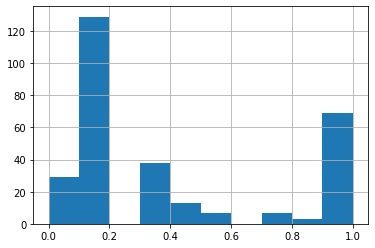

In [21]:
pd.Series(y_pred_prob[:,1]).hist()

In [22]:
y_pred = np.where(y_pred_prob[:,1] > 0.2, 1,0)

In [23]:
precision_score(y_test, y_pred)

0.7372262773722628

In [24]:
recall_score(y_test, y_pred)

0.8416666666666667

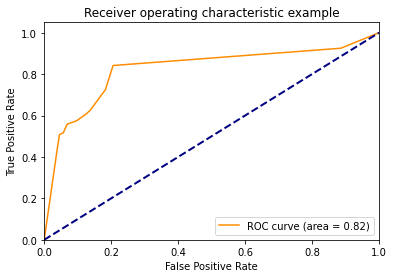

In [25]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
          label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [34]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split = 100,
                                 min_samples_leaf = 10)

In [35]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10,
                       min_samples_split=100)

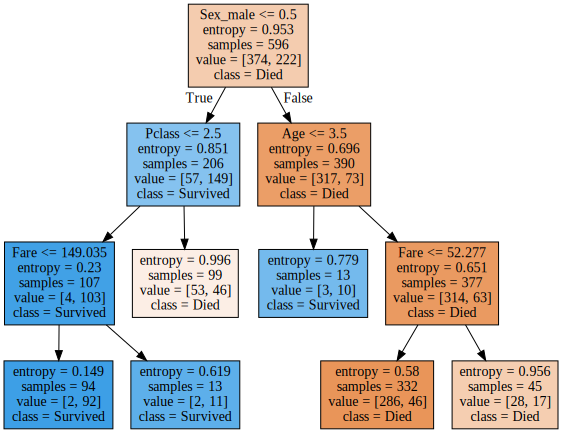

In [36]:
graph = Source(tree.export_graphviz(clf, out_file=None,
               feature_names=list(X), class_names=["Died", "Survived"],
               filled = True))

display(SVG(graph.pipe(format='svg')))